In [1]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [2]:
import pandas as pd
import numpy as np

import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)
import warnings
warnings.filterwarnings("ignore")

## GETTING DATA

In [3]:
df = pd.read_csv('df_final_.csv')

In [4]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.00,598.00,4.00,650.00,28.00,9.00,14.00,cool_stuff,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.00,2017-09-21 00:00:00,2017-09-22 10:57:03,1.00,credit_card,2.00,72.19,27277,volta redonda,SP,-22.50,-44.12,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.76,-41.31
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.00,239.00,2.00,30000.00,50.00,30.00,40.00,pet_shop,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.00,2017-05-13 00:00:00,2017-05-15 11:34:13,1.00,credit_card,3.00,259.83,3471,sao paulo,SP,-23.57,-46.52,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.21,-50.94
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.00,695.00,2.00,3050.00,33.00,13.00,33.00,furniture_decor,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.00,2018-01-23 00:00:00,2018-01-23 16:06:31,1.00,credit_card,5.00,216.87,37564,borda da mata,MG,-22.26,-46.16,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.86,-44.60
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.00,480.00,1.00,200.00,16.00,10.00,15.00,perfumery,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.00,2018-08-15 00:00:00,2018-08-15 16:39:01,1.00,credit_card,2.00,25.78,14403,franca,SP,-20.55,-47.40,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.14,-46.54
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.00,409.00,1.00,3750.00,35.00,40.00,30.00,garden_tools,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.00,2017-03-02 00:00:00,2017-03-03 10:54:59,1.00,credit_card,3.00,218.04,87900,loanda,PR,-22.93,-53.13,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.25,-46.82


In [5]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 118310 rows and 40 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_name_lenght            116601 non-null  float64
 8   product_description_lenght     116601 non-null  float64
 9   product_photos_qty             116601 non-null  float64
 10  product_weight_g               118290 non-null  float64
 11  product_length_cm              118290 non-null  float64
 12  product_height_cm             

In [7]:
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)[:20]

order_delivered_customer_date   2.19
product_category_name_english   1.47
product_name_lenght             1.44
product_description_lenght      1.44
product_photos_qty              1.44
order_delivered_carrier_date    1.06
review_answer_timestamp         0.83
review_creation_date            0.83
review_score                    0.83
review_id                       0.83
customer_geolocation_lng        0.27
customer_geolocation_lat        0.27
seller_geolocation_lng          0.22
seller_geolocation_lat          0.22
product_length_cm               0.02
product_width_cm                0.02
product_weight_g                0.02
product_height_cm               0.02
order_approved_at               0.01
payment_installments            0.00
dtype: float64

- There are few missing values in the dataset, and some of these missing values are due to not delivered products yet.

In [8]:
df.describe([.05, .1, .25, .75, .9, .95, .99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
order_item_id,118310.00,1.20,0.70,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,4.00,21.00
price,118310.00,120.65,184.11,0.85,17.00,23.75,39.90,74.90,134.90,229.90,349.90,895.00,6735.00
freight_value,118310.00,20.03,15.84,0.00,7.78,8.76,13.08,16.28,21.18,34.15,45.30,84.94,409.68
product_name_lenght,116601.00,48.77,10.03,5.00,29.00,33.00,42.00,52.00,57.00,59.00,60.00,63.00,76.00
product_description_lenght,116601.00,785.97,652.58,4.00,160.00,213.00,346.00,600.00,983.00,1582.00,2123.00,3419.00,3992.00
product_photos_qty,116601.00,2.21,1.72,1.00,1.00,1.00,1.00,1.00,3.00,5.00,6.00,8.00,20.00
product_weight_g,118290.00,2112.25,3786.70,0.00,125.00,150.00,300.00,700.00,1800.00,6250.00,9850.00,18600.00,40425.00
product_length_cm,118290.00,30.27,16.19,7.00,16.00,16.00,18.00,25.00,38.00,51.00,62.00,95.00,105.00
product_height_cm,118290.00,16.62,13.45,2.00,3.00,4.00,8.00,13.00,20.00,31.00,45.00,65.00,105.00
product_width_cm,118290.00,23.07,11.75,6.00,11.00,12.00,15.00,20.00,30.00,40.00,45.00,62.00,118.00


- The price column has a mean of 120.65 and a standard deviation of 184.11. Although it may seem like there are outliers at first glance, this situation can be ignored as there are products in many different categories in the data set.
- I considered rows with more than 5 payment types as incorrect rows because there are 5 different payment types in the dataset.

In [9]:
df[df['payment_sequential'] > 5].shape

(539, 40)

In [10]:
df.loc[df['payment_sequential'] > 5, 'payment_sequential'] = 5 

- Since the number of installments can be at least 1, rows with 0 installments are incorrect.

In [11]:
df[df['payment_installments'] == 0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng
12139,1a57108394169c0b47d8f876acc9ba2d,1,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28,56.00,235.00,1.00,500.00,23.00,11.00,23.00,housewares,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06 00:00:00,bc5dca6c957c328b1cbff760b0841fd2,5.00,2018-05-25 00:00:00,2018-05-26 00:24:28,2.00,credit_card,0.00,129.94,31573,belo horizonte,MG,-19.81,-43.99,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,-12.26,-38.97
12140,1a57108394169c0b47d8f876acc9ba2d,2,db35a562fb6ba63e19fa42a15349dc04,282f23a9769b2690c5dda22e316f9941,2018-05-18 16:31:54,41.69,23.28,56.00,235.00,1.00,500.00,23.00,11.00,23.00,housewares,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06 00:00:00,bc5dca6c957c328b1cbff760b0841fd2,5.00,2018-05-25 00:00:00,2018-05-26 00:24:28,2.00,credit_card,0.00,129.94,31573,belo horizonte,MG,-19.81,-43.99,9925e1d7dff0d807355599dee04830ab,44001,feira de santana,BA,-12.26,-38.97
53921,744bade1fcf9ff3f31d860ace076d422,1,0cf573090c66bb30ac5e53c82bdb0403,7202e2ba20579a9bd1acb29e61fe71f6,2018-04-26 12:31:06,45.90,12.79,26.00,108.00,1.00,128.00,15.00,8.00,13.00,telephony,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,2018-05-16 00:00:00,c56b4b7042f417e70d3dc5340deb23fe,5.00,2018-04-28 00:00:00,2018-04-29 17:43:50,2.00,credit_card,0.00,58.69,14401,franca,SP,-20.53,-47.40,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,-23.43,-46.58


In [12]:
df = df[df['payment_installments'] != 0]

In [13]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 118307
Variables: 40
cat_cols: 4
num_cols: 18
cat_but_car: 18
num_but_cat: 2


In [14]:
cols = [col for col in df.columns if col not in num_cols]

for col in cols: 
    print(f'Nunique of {col} : {df[col].nunique()}')

Nunique of order_id : 98664
Nunique of product_id : 32951
Nunique of seller_id : 3095
Nunique of shipping_limit_date : 93316
Nunique of product_category_name_english : 71
Nunique of order_status : 7
Nunique of order_purchase_timestamp : 98110
Nunique of order_approved_at : 90173
Nunique of order_delivered_carrier_date : 81016
Nunique of order_delivered_customer_date : 95662
Nunique of order_estimated_delivery_date : 450
Nunique of review_id : 97707
Nunique of review_score : 5
Nunique of review_creation_date : 633
Nunique of review_answer_timestamp : 97545
Nunique of payment_sequential : 5
Nunique of payment_type : 4
Nunique of seller_city : 611
Nunique of seller_state : 23
Nunique of customer_unique_id : 95418
Nunique of customer_city : 4110
Nunique of customer_state : 27


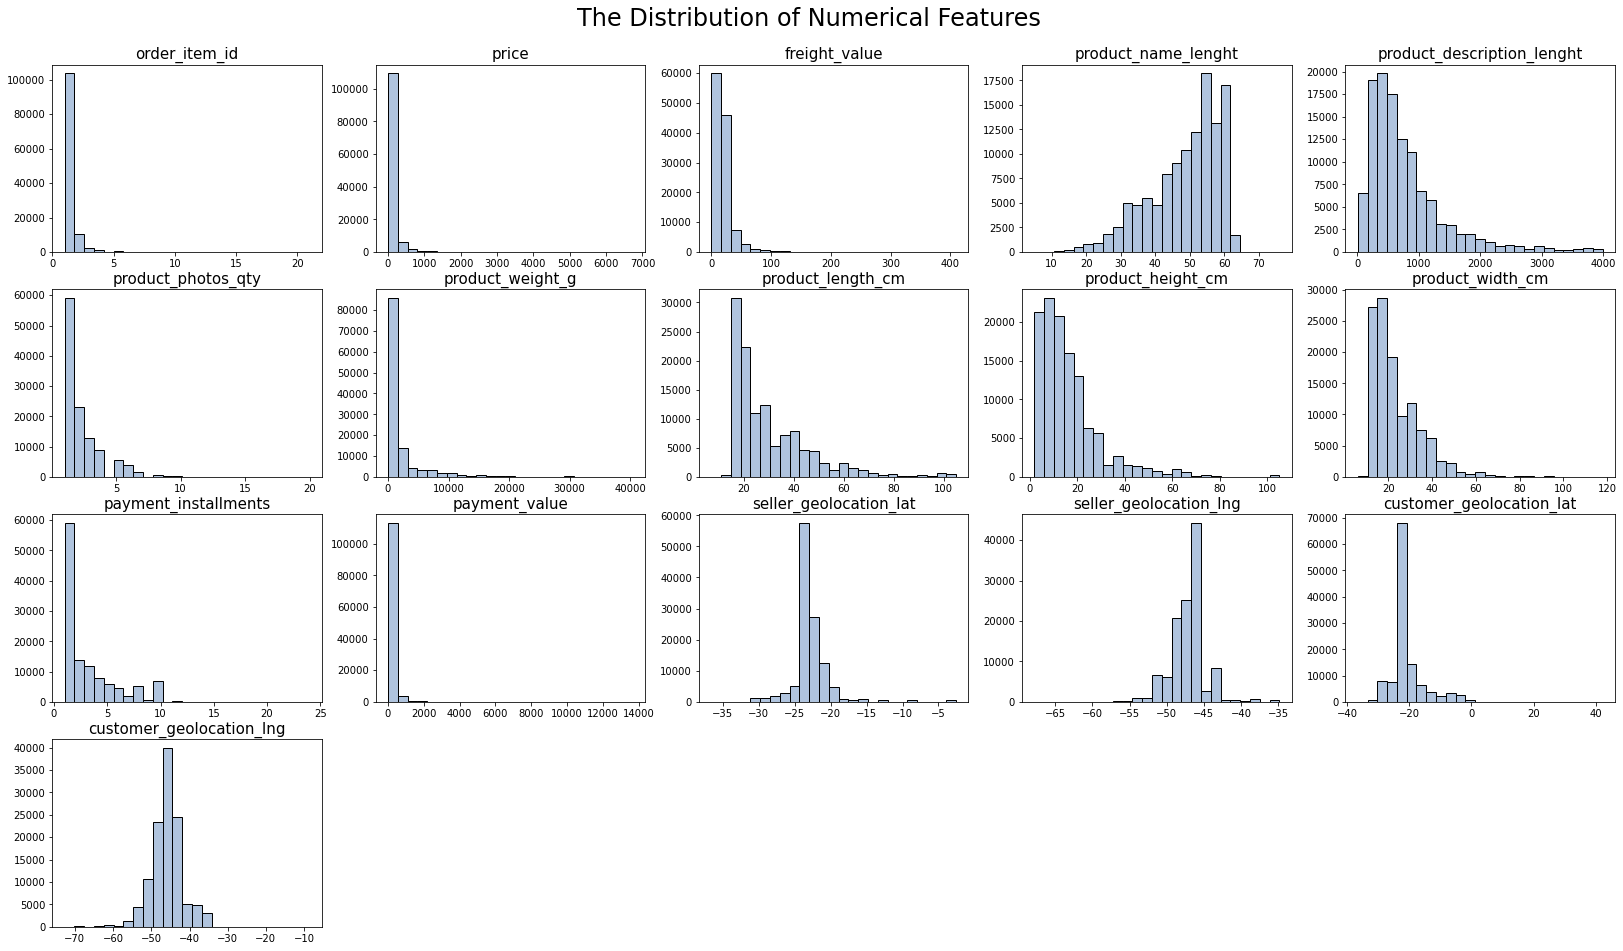

In [15]:
cols_ = [col for col in num_cols if 'prefix' not in col]
plt.figure(figsize=(28, 20))
for i, col in enumerate(cols_):
    plt.subplot(5, 5, i+1)
    ax = plt.hist(df[col], color='lightsteelblue', edgecolor='black', bins=25)
    plt.title(f'{col}', fontsize=15)
    plt.suptitle('The Distribution of Numerical Features', size=24, y=0.92)
plt.show()

In [16]:
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])

- In order to be able to analyze hourly, daily and monthly, new columns must be created from the data set.
- The sale price of the product in each row is equal to the sum of the freight value and the price of that product.

In [17]:
df['order_purchase_year'] = df.order_purchase_timestamp.dt.year
df['order_purchase_month'] = df.order_purchase_timestamp.dt.month
df['order_purchase_day_of_week'] = df.order_purchase_timestamp.dt.dayofweek
df['order_purchase_hour'] = df.order_purchase_timestamp.dt.hour
df['month_year'] = df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_purchase_year'].astype(str) + '-' + df['month_year'].astype(str)
df['delivered_time'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days
df['sale_price'] = df['price'] + df['freight_value']

In [18]:
df['order_purchase_day_of_week'] = df['order_purchase_day_of_week'].map({0:'0-Mon', 1:'1-Tue', 2:'2-Wed', 3:'3-Thu', 4:'4-Fri', 5:'5-Sat', 6:'6-Sun'})

- Brazil is a federation composed of 26 states, one federal district, and the 5570 municipalities. The states and the federal district may be grouped into regions: Northern, Northeast, Central-West, Southeast and Southern.

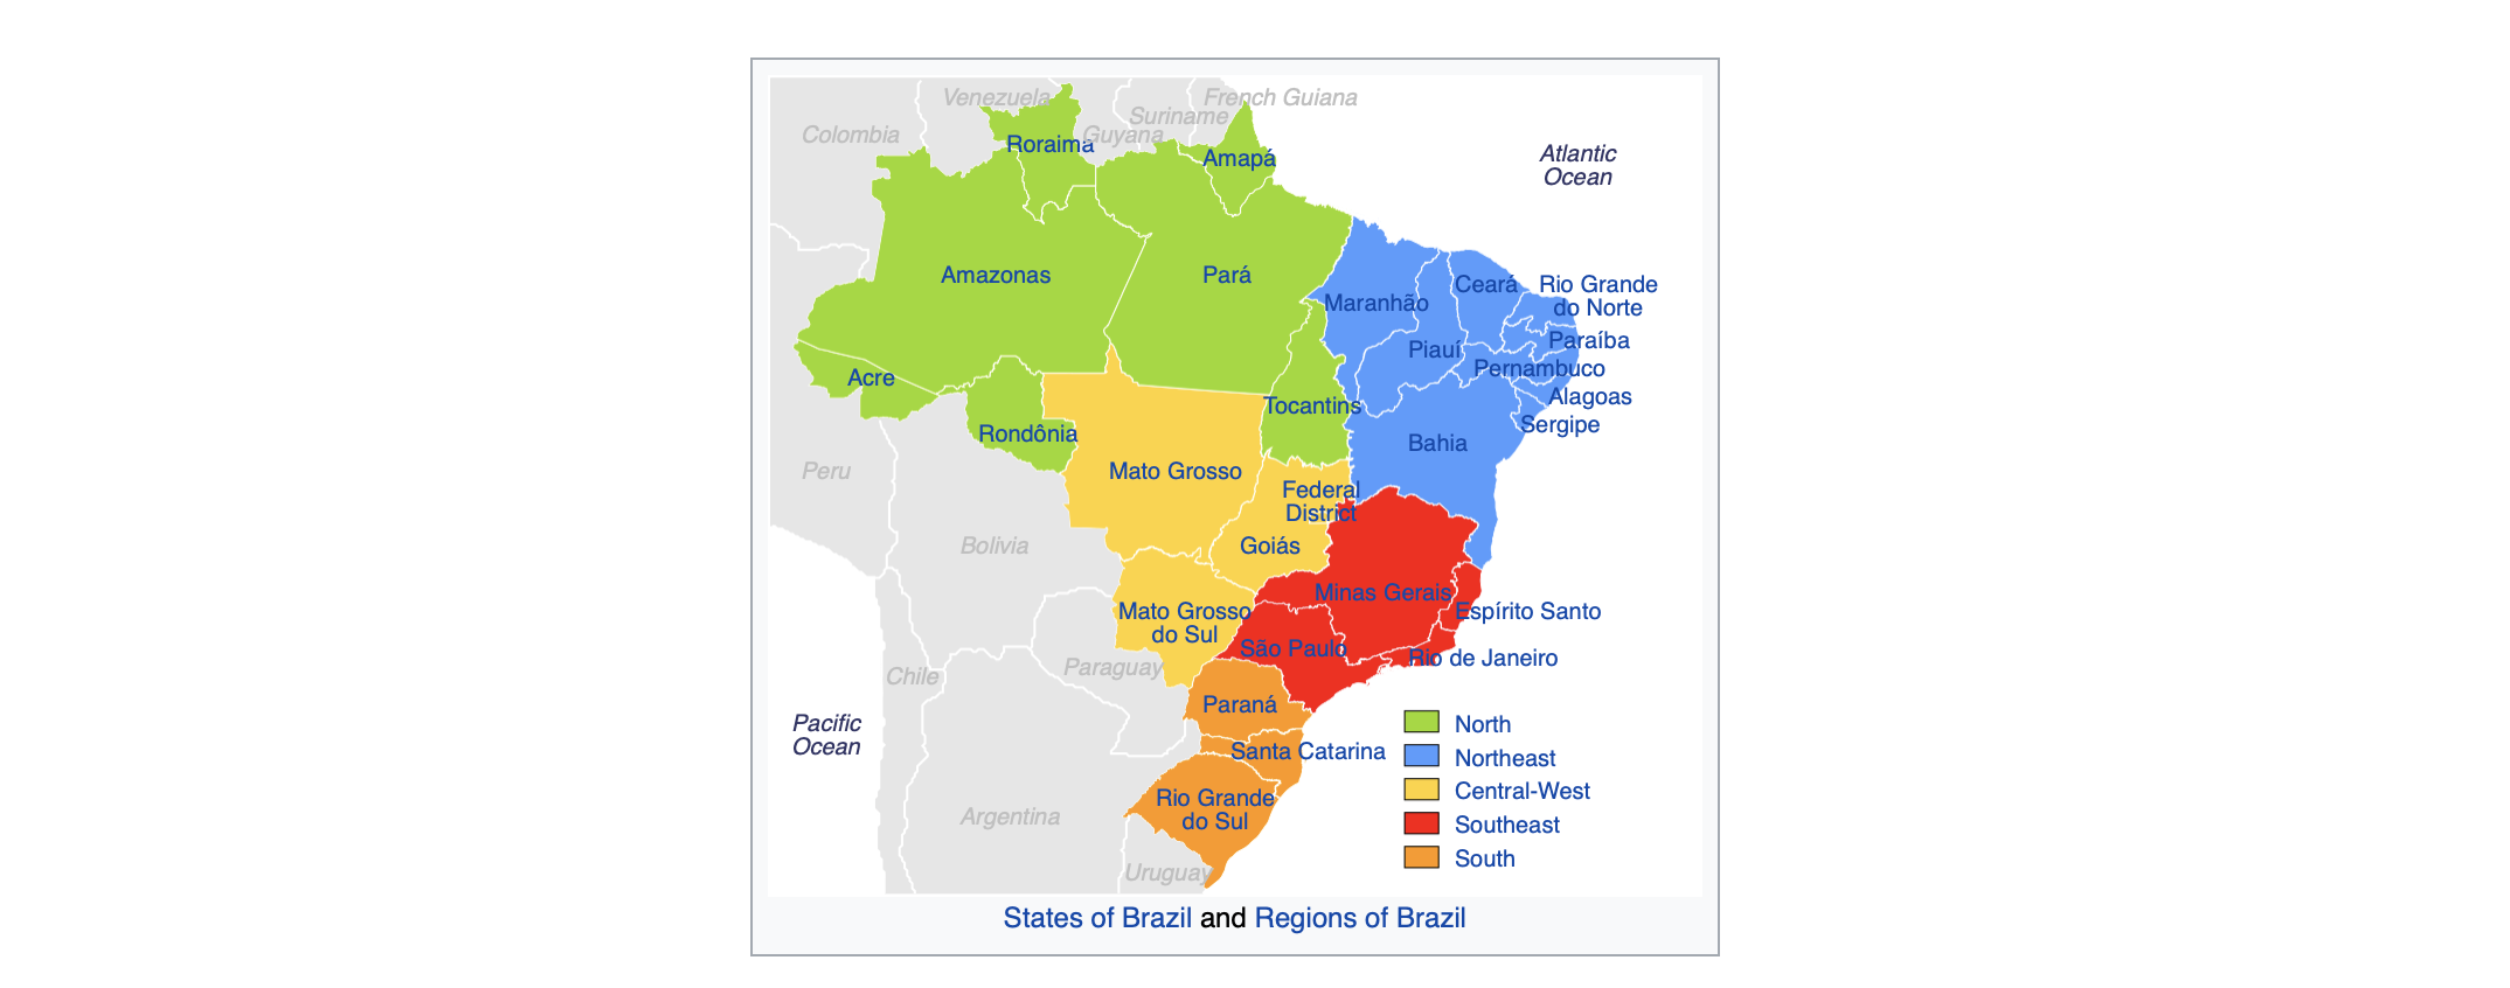

In [19]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df.loc[df['customer_state'].isin(sudeste), 'customer_region'] = 'Southeast'
df.loc[df['customer_state'].isin(nordeste), 'customer_region'] = 'Northeast'
df.loc[df['customer_state'].isin(norte), 'customer_region'] = 'North'
df.loc[df['customer_state'].isin(centro_oeste), 'customer_region'] = 'Midwest'
df.loc[df['customer_state'].isin(sul), 'customer_region'] = 'South'

df.loc[df['seller_state'].isin(sudeste), 'seller_region'] = 'Southeast'
df.loc[df['seller_state'].isin(nordeste), 'seller_region'] = 'Northeast'
df.loc[df['seller_state'].isin(norte), 'seller_region'] = 'North'
df.loc[df['seller_state'].isin(centro_oeste), 'seller_region'] = 'Midwest'
df.loc[df['seller_state'].isin(sul), 'seller_region'] = 'South'

### Order Status

- Canceled orders will not be used in these calculations in order not to cause errors in calculations such as the number of orders and total profit.

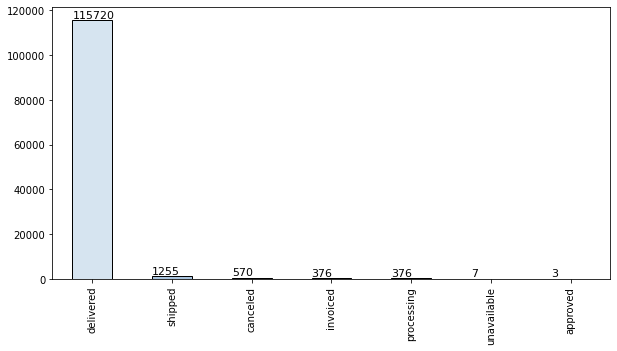

In [20]:
plt.figure(figsize=(10, 5))
palette = sns.color_palette('BuPu', 5)
ax = df['order_status'].value_counts().plot(kind='bar', color=palette, edgecolor='black')
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x(), p.get_height()+1000), fontsize=11)

In [21]:
df_ = df.copy()

In [22]:
df = df[(df['order_status'] != 'canceled') & (df['order_status'] != 'unavailable')] 

- There are duplicate rows in the dataset. I prefer to use datasets prepared using different filters in different analyses.

In [23]:
df_filtered_seller = df.drop_duplicates(subset=['order_id', 'seller_id'], keep='first')
df_filtered_product = df.drop_duplicates(subset=['order_id', 'product_id'], keep='first')
df_filtered_category = df.drop_duplicates(subset=['order_id', 'product_category_name_english'], keep='first')
df_filtered_review = df.drop_duplicates(subset=['order_id'], keep='first')
df_filtered_order_item = df.drop_duplicates(subset=['order_id', 'customer_unique_id'], keep='last')

## TOTAL ORDER - TOTAL PROFIT

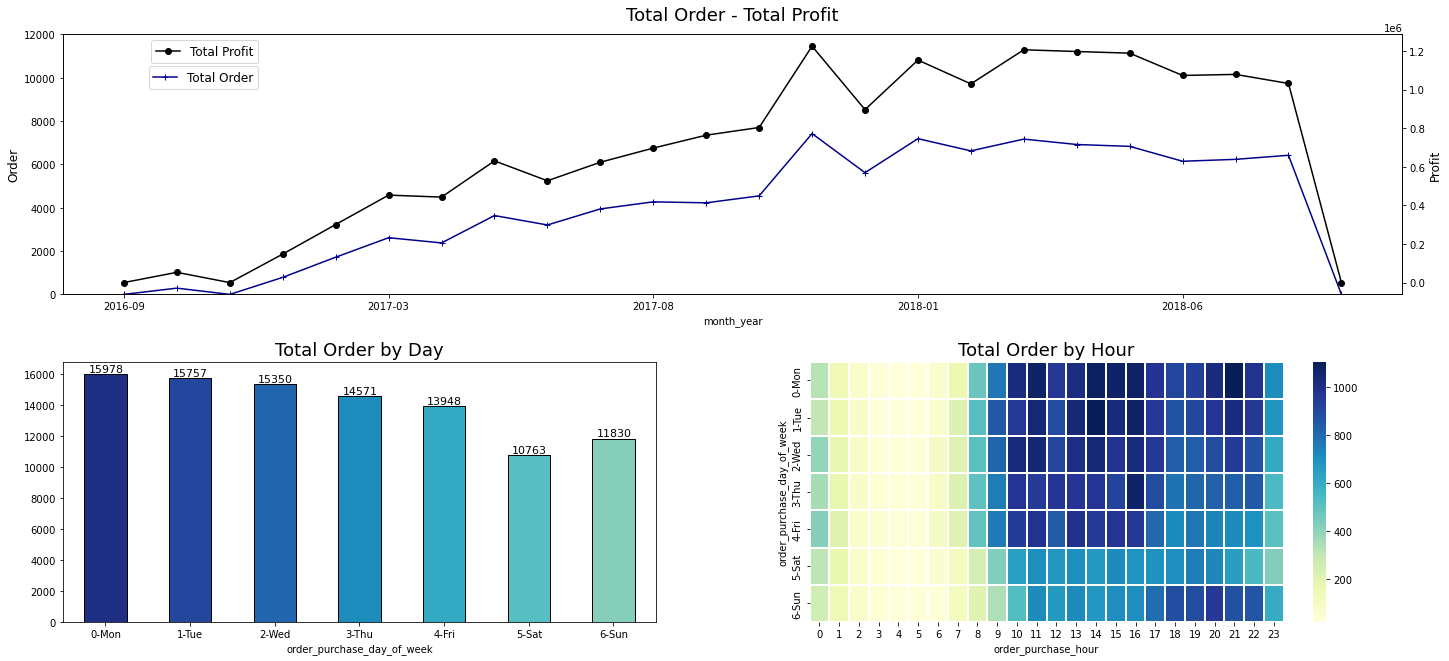

In [24]:
plt.figure(figsize=(24, 12))

gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[:2, :])
palette = sns.color_palette('BuPu', 30)
df.groupby('month_year').order_id.nunique().plot(color='darkblue', marker='+', label='Total Order')
ax1.set_ylim([0, 12000])
ax1_ = ax1.twinx()
ax1_= df.groupby('month_year')['sale_price'].sum().plot(color='black', marker='o', label='Total Profit')

ax1.set_title('Total Order - Total Profit', fontsize=18, y=1.0, pad=14)
ax1.legend(bbox_to_anchor=(0.15, 0.9), fontsize=12)
ax1.set_ylabel('Order', fontsize=12)
ax1_.legend(bbox_to_anchor=(0.15, 1), fontsize=12)
ax1_.set_ylabel('Profit', fontsize=12)

ax2 = plt.subplot(gs[2:4, :2])
palette = sns.color_palette('YlGnBu_r', 10)
ax2 = df.groupby('order_purchase_day_of_week').order_id.nunique().plot(kind='bar', color=palette, edgecolor='black')
for p in ax2.patches:
    ax2.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+120), fontsize=11)

ax2.tick_params('x', labelrotation=0)
ax2.set_title('Total Order by Day', fontsize=18, y=1.0, pad=7)

ax3 = plt.subplot(gs[2:4:, 2:4])
purchase_count = df_filtered_product.groupby(['order_purchase_day_of_week', 'order_purchase_hour'])['order_id'].nunique().unstack()
sns.heatmap(purchase_count, linewidths=0.2, cmap='YlGnBu')
ax3.set_title('Total Order by Hour', fontsize=18, y=1.0, pad=7)

plt.subplots_adjust(left=0.125, bottom=0.2, right=0.9, wspace=0.7, hspace=0.7)
plt.show()

#### Some Inferences : 

- In the 11th month of 2017, the most orders were ordered and the most money was spent due to the Black Friday .
- When we look at the hourly and daily sales, it is seen that the most transactions are made between 11-16 on Mondays and Tuesdays.

## REGION - STATES

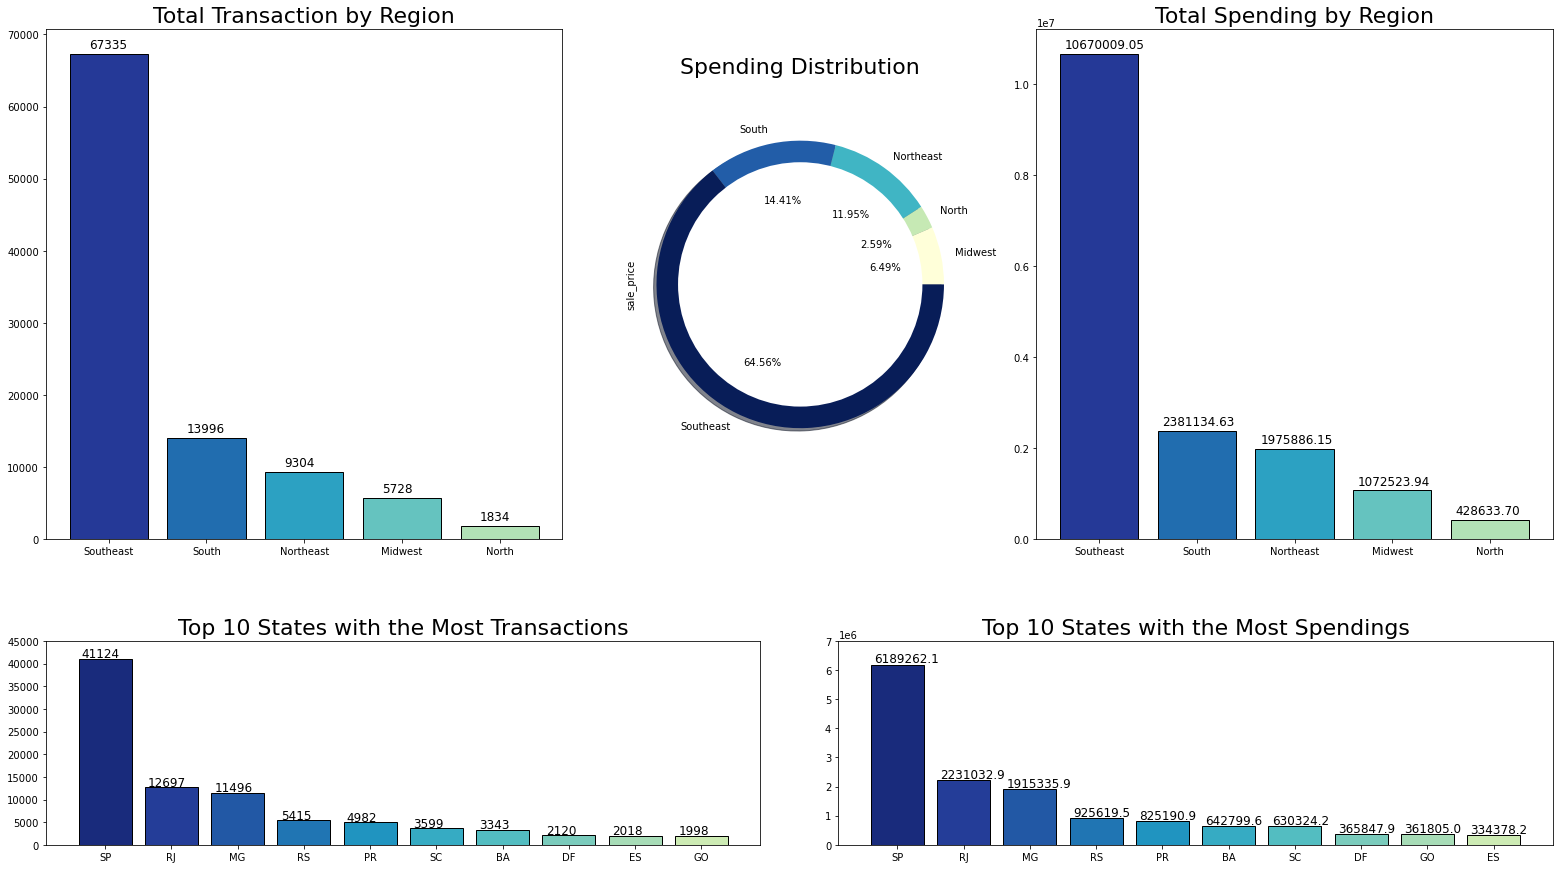

In [25]:
plt.figure(figsize=(27, 15))

gs = gridspec.GridSpec(3, 8)
ax1 = plt.subplot(gs[:2, :3])
cust_reg_order = df.groupby('customer_region')[['order_id']].nunique().sort_values(by='order_id', ascending=False).reset_index()
palette = sns.color_palette('YlGnBu_r', 6)
plt.bar(cust_reg_order['customer_region'], cust_reg_order['order_id'], color=palette, edgecolor='black')
for p in ax1.patches:
    ax1.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+800), fontsize=12)
ax1.set_title('Total Transaction by Region', fontsize=22, y=1.0, pad=7)


ax2 = plt.subplot(gs[:2, 5:])
cust_reg_price = df.groupby('customer_region')[['sale_price']].sum().sort_values(by='sale_price', ascending=False).reset_index()
plt.bar(cust_reg_price['customer_region'], cust_reg_price['sale_price'], color=palette, edgecolor='black')
for p in ax2.patches:
    ax2.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+120000), fontsize=12)
ax2.set_title('Total Spending by Region', fontsize=22, y=1.0, pad=7)

ax3 = plt.subplot(gs[:2, 3:5])
df.groupby('customer_region')['sale_price'].sum().plot(kind='pie', autopct='%1.2f%%', cmap='YlGnBu', shadow=True)
centre_circle = plt.Circle((0, 0),0.85, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax3.axis('equal')
ax3.set_title('Spending Distribution', fontsize=22, y=0.9, pad=7)

ax4 = plt.subplot(gs[2:, :4])
cust_state_order = df.groupby('customer_state')[['order_id']].nunique().sort_values(by='order_id', ascending=False).reset_index()[:10]
palette = sns.color_palette('YlGnBu_r', 12)
plt.bar(cust_state_order['customer_state'], cust_state_order['order_id'], color=palette, edgecolor='black')
ax4.set_ylim([0, 45000])
for p in ax4.patches:
    ax4.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+300), fontsize=12)
ax4.set_title('Top 10 States with the Most Transactions', fontsize=22, y=1.0, pad=7)   

ax5 = plt.subplot(gs[2:, 4:])
cust_state_price = df.groupby('customer_state')[['sale_price']].sum().sort_values(by='sale_price', ascending=False).reset_index()[:10]
plt.bar(cust_state_price['customer_state'], cust_state_price['sale_price'], color=palette, edgecolor='black')
ax5.set_title('Top 10 States with the Most Spendings', fontsize=22, y=1.0, pad=7)
ax5.set_ylim([0, 7000000])
for p in ax5.patches:
    ax5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+70000), fontsize=12)
    
plt.subplots_adjust(wspace=0.65, hspace=0.5)
plt.show()

- The Southeast region is the most densely populated and resource-rich region in the country. It is home to two of Brazil's largest cities: Rio de Janeiro and São Paulo. Therefore, this region is the region with the most transactions.

## SELLER STATE -> CUSTOMER REGION

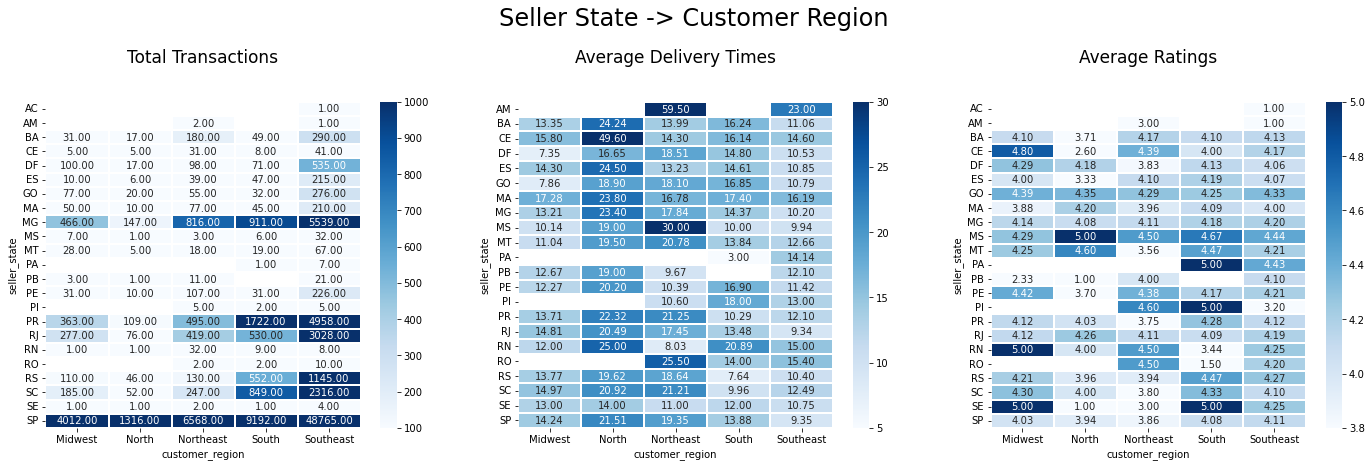

In [26]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
seller_customer_order = pd.pivot_table(df, values='order_id', index=['seller_state'], columns=['customer_region'], aggfunc='nunique')
sns.heatmap(seller_customer_order, annot=True, fmt='.2f', cmap='Blues', vmin=100, vmax=1000, linewidths=0.1)
plt.title('Total Transactions', fontsize=17, y=1.1, pad=7)

plt.subplot(1, 3, 2) 
seller_customer_del = pd.pivot_table(df_filtered_product, values='delivered_time', index=['seller_state'],columns=['customer_region'], aggfunc=np.mean)
sns.heatmap(seller_customer_del, annot=True, fmt='.2f', cmap='Blues', vmin=5, vmax=30, linewidths=0.1)
plt.title('Average Delivery Times', fontsize=17, y=1.1, pad=7)

plt.subplot(1, 3, 3)
seller_review = pd.pivot_table(df_filtered_seller, values='review_score', index=['seller_state'], columns=['customer_region'], aggfunc=np.mean)
sns.heatmap(seller_review, annot=True, fmt='.2f', cmap='Blues', vmin=3.8, linewidths=0.1)
plt.title('Average Ratings', fontsize=17, y=1.1, pad=7)

plt.suptitle('Seller State -> Customer Region', fontsize=24, y=1.1)
plt.show()

- There is a negative correlation between the average order delivery time and the review score.
- One of the most important factors affecting the delivery time is the distance between the seller's location and the customer's location.For example, the average delivery time for orders from a seller in the state of RS to a customer in the South region is 7.64 days and the average review score is 4.47, while the average delivery time for orders from the South region of RJ is 13.48 and the average review score average is 4.09.

## CUSTOMER ANALYSIS

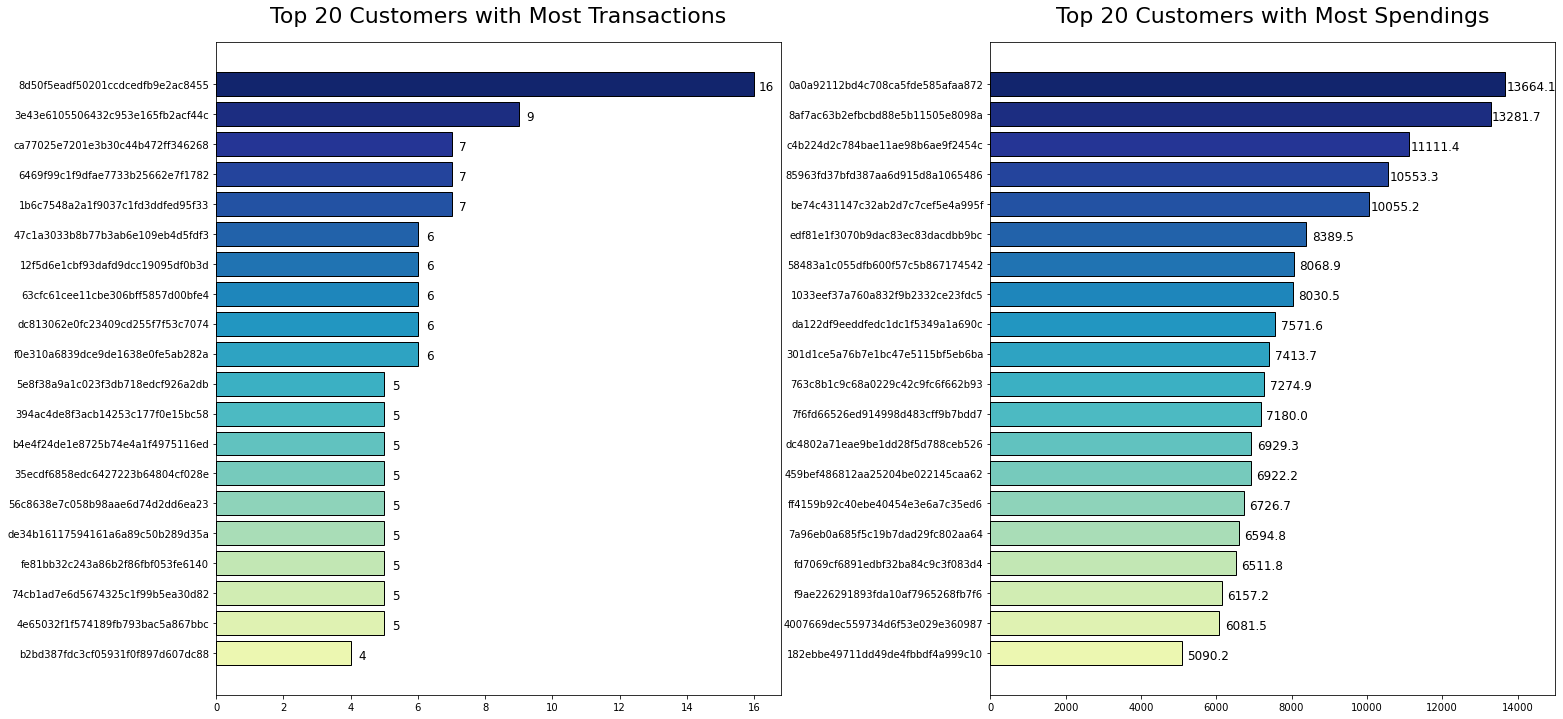

In [27]:
plt.figure(figsize=(24,12))

plt.subplot(1, 2, 1)
customer_order = df.groupby('customer_unique_id')[['order_id']].nunique().sort_values(by='order_id', ascending=False).reset_index()[:20]
palette = sns.color_palette('YlGnBu_r', 22)
ax = plt.barh(customer_order['customer_unique_id'], customer_order['order_id'], color=palette, edgecolor='black')
for p in ax.patches:
    width = p.get_width()
    plt.text(0.35+p.get_width(), p.get_y()+0.6*p.get_height(),'{:d}'.format(width), ha='center', va='center', fontsize=12)
plt.title('Top 20 Customers with Most Transactions', fontsize=22, y=1.02, pad=7)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
customer_price = df.groupby('customer_unique_id')[['sale_price']].sum().sort_values(by='sale_price', ascending=False).reset_index()[:20]
ax = plt.barh(customer_price['customer_unique_id'], customer_price['sale_price'], color=palette, edgecolor='black')
plt.xlim([0, 15000])
for p in ax.patches:
    width = p.get_width()
    plt.text(700+p.get_width(), p.get_y()+0.6*p.get_height(),'{:.1f}'.format(width), ha='center', va='center', fontsize=12)
plt.title('Top 20 Customers with Most Spendings', fontsize=22, y=1.02, pad=7)
plt.gca().invert_yaxis()

plt.subplots_adjust(wspace=0.37)
plt.show()

## PRODUCT ANALYSIS

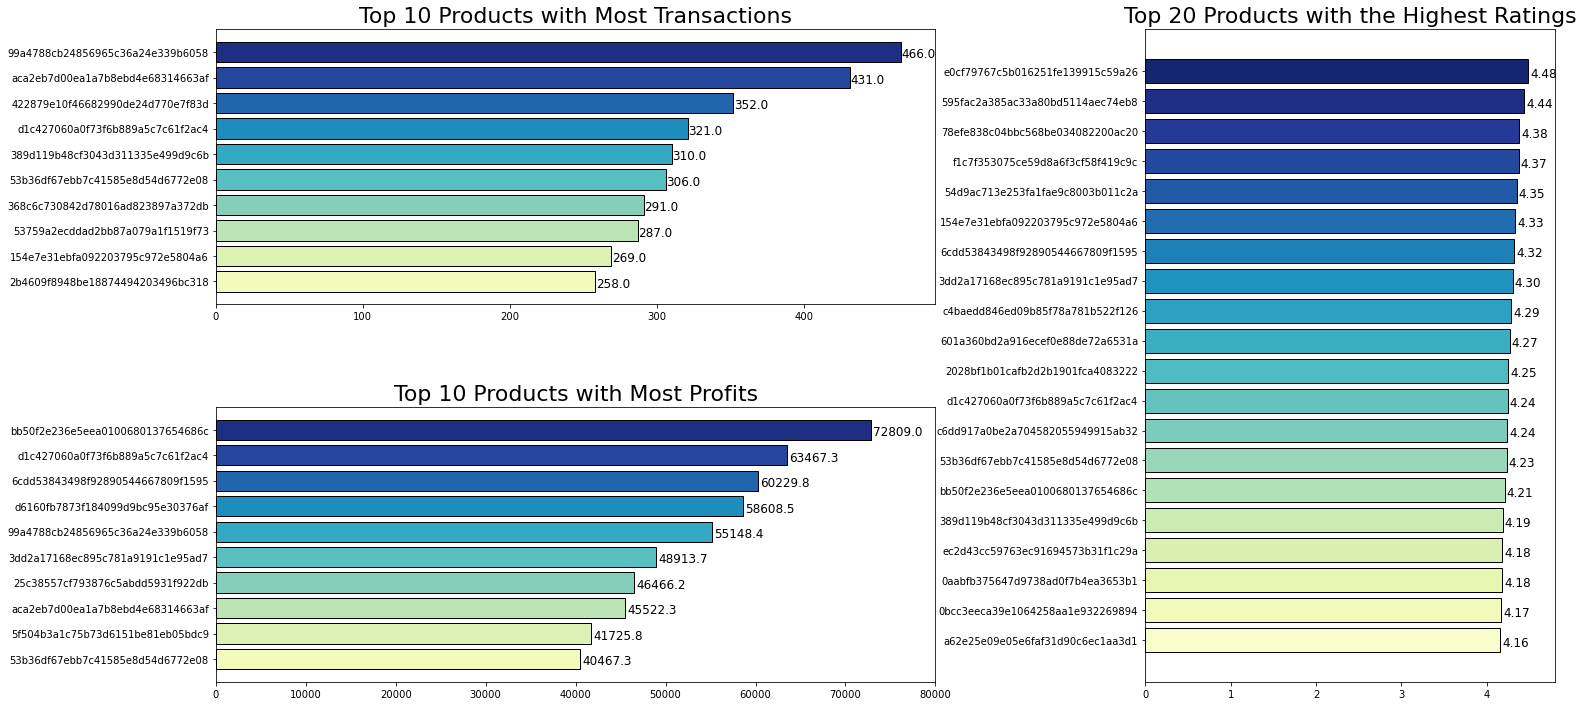

In [28]:
plt.figure(figsize=(24, 12))

gs = gridspec.GridSpec(4, 5)

ax1 = plt.subplot(gs[:2, :3])
product_order = df.groupby('product_id')[['order_id']].nunique().sort_values(by='order_id', ascending=False).reset_index()[:10]
palette = sns.color_palette('YlGnBu_r', 10)
plt.barh(product_order['product_id'], product_order['order_id'], color=palette, edgecolor='black')
for p in ax1.patches:
    width = p.get_width()
    plt.text(12+p.get_width(), p.get_y()+0.6*p.get_height(),'{:.1f}'.format(width), ha='center', va='center', fontsize=12) 
ax1.set_title('Top 10 Products with Most Transactions', fontsize=22, y=1.0, pad=7)
plt.gca().invert_yaxis()

ax2 = plt.subplot(gs[2:, :3])
product_price = df.groupby('product_id')[['sale_price']].sum().sort_values(by='sale_price', ascending=False).reset_index()[:10]
plt.barh(product_price['product_id'], product_price['sale_price'], color=palette, edgecolor='black')
ax2.set_xlim([0, 80000])
for p in ax2.patches:
    width = p.get_width()
    plt.text(3000+p.get_width(), p.get_y()+0.6*p.get_height(),'{:.1f}'.format(width), ha='center', va='center', fontsize=12) 
ax2.set_title('Top 10 Products with Most Profits', fontsize=22, y=1.0, pad=7)
plt.gca().invert_yaxis()

ax3 = plt.subplot(gs[:, 3:])

product_counts = pd.DataFrame(df_filtered_product['product_id'].value_counts())
rare_products = product_counts[product_counts['product_id'] < 100].index
common_products = df_filtered_product[~df_filtered_product['product_id'].isin(rare_products)]
order_ = common_products.groupby('product_id')['review_score'].mean().sort_values(ascending=False)[:20].reset_index()
palette = sns.color_palette('YlGnBu_r', 20)
ax3.set_xlim([0, 4.8])
plt.barh(order_['product_id'], order_['review_score'], color=palette, edgecolor='black')
ax3.set_title('Top 20 Products with the Highest Ratings', fontsize=22, y=1.0, pad=7)
plt.gca().invert_yaxis()
for p in ax3.patches:
    width = p.get_width()
    plt.text(0.18+p.get_width(), p.get_y()+0.6*p.get_height(),'{:.2f}'.format(width), ha='center', va='center', fontsize=12)
    
plt.subplots_adjust(wspace=2.1, hspace=1.2)
plt.show()

- The 3 best-selling products are not in the top 20 in terms of review scores. More communication should be established with customers who buy these 3 products.

## CATEGORY ANALYSIS

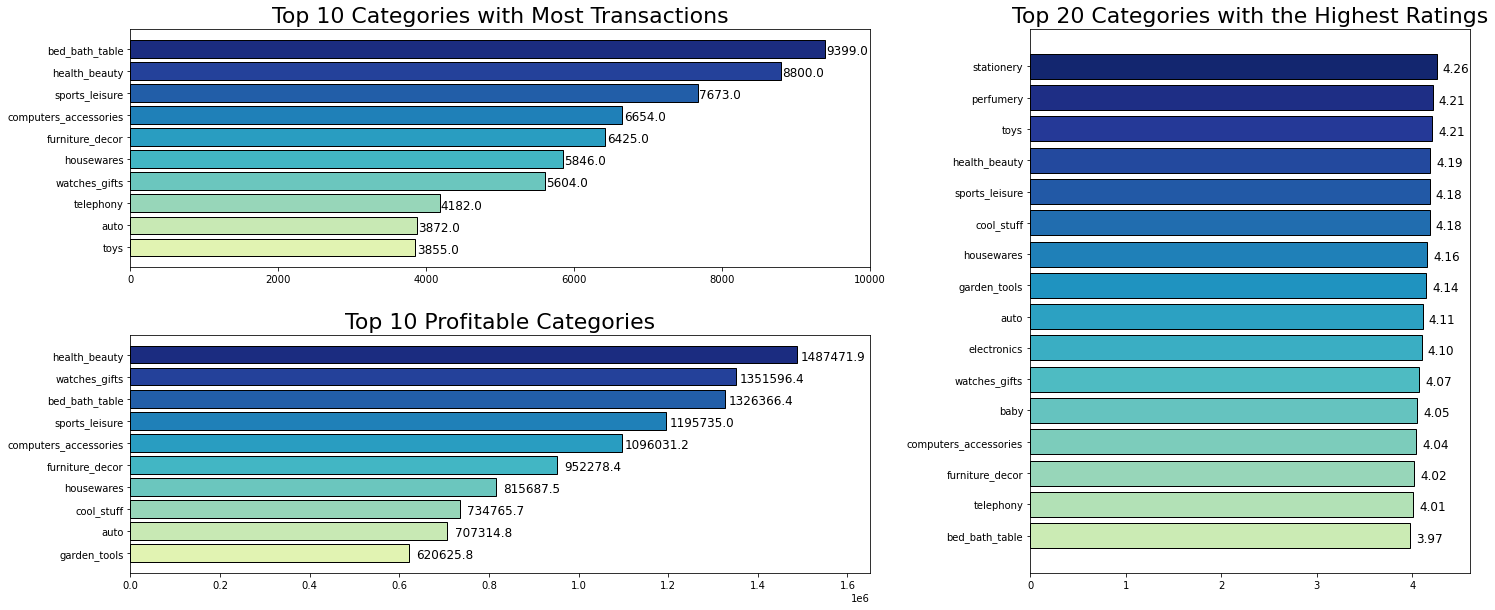

In [29]:
plt.figure(figsize=(24, 10))

gs = gridspec.GridSpec(4, 5)


ax1 = plt.subplot(gs[:2, :3])
category_order = df.groupby('product_category_name_english')[['order_id']].nunique().sort_values(by='order_id', ascending=False).reset_index()[:10]
palette = sns.color_palette('YlGnBu_r', 11)
plt.barh(category_order['product_category_name_english'], category_order['order_id'], color=palette, edgecolor='black')
ax1.set_xlim([0, 10000])
for p in ax1.patches:
    width = p.get_width()
    plt.text(300+p.get_width(), p.get_y()+0.6*p.get_height(),'{:.1f}'.format(width), ha='center', va='center', fontsize=12)
ax1.set_title('Top 10 Categories with Most Transactions', fontsize=22, y=1.0, pad=7)
plt.gca().invert_yaxis()

ax2 = plt.subplot(gs[2:, :3])
category_price = df.groupby('product_category_name_english')[['sale_price']].sum().sort_values(by='sale_price', ascending=False).reset_index()[:10]
plt.barh(category_price['product_category_name_english'], category_price['sale_price'], color=palette, edgecolor='black')
ax2.set_xlim([0, 1650000])
for p in ax2.patches:
    width = p.get_width()
    plt.text(80000+p.get_width(), p.get_y()+0.6*p.get_height(),'{:.1f}'.format(width), ha='center', va='center', fontsize=12)
ax2.set_title('Top 10 Profitable Categories', fontsize=22, y=1.0, pad=7)
plt.gca().invert_yaxis()

ax3 = plt.subplot(gs[:, 3:])
category_counts = pd.DataFrame(df_filtered_category['product_category_name_english'].value_counts())
rare = category_counts[category_counts['product_category_name_english'] < 2000].index
common_categories = df_filtered_category[~df_filtered_category['product_category_name_english'].isin(rare)]
order = common_categories.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)[:20].reset_index()
palette = sns.color_palette('YlGnBu_r', 20)
plt.barh(order['product_category_name_english'], order['review_score'], color=palette, edgecolor='black')
ax3.set_xlim([0, 4.6])
for p in ax3.patches:
    width = p.get_width()
    plt.text(0.2+p.get_width(), p.get_y()+0.6*p.get_height(),'{:.2f}'.format(width), ha='center', va='center', fontsize=12)
ax3.set_title('Top 20 Categories with the Highest Ratings', fontsize=22, y=1.0, pad=7)

plt.subplots_adjust(wspace=1.15, hspace=0.8)
plt.gca().invert_yaxis()
plt.show()

- Although the bed_bath_table category is the best-selling category, it is not very successful in terms of average review score. If the customer satisfaction in this category is increased, much more profit can be made. The shipping processes of sales belonging to this category should be improved, sellers should be concerned more with customers, and customer services should be made more active.

## PAYMENT TYPE

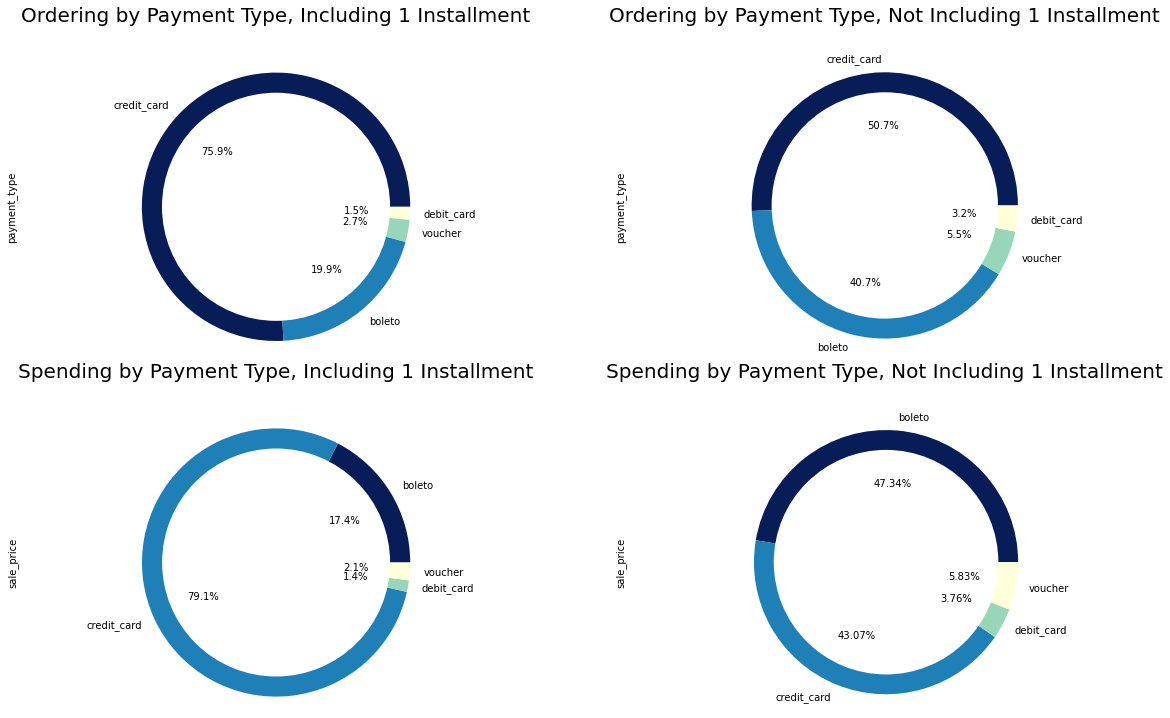

In [30]:
plt.figure(figsize=(20, 12))
ax1 = plt.subplot(2, 2, 1)
df_filtered_review['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='YlGnBu_r')
centre_circle = plt.Circle((0, 0),0.85, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title('Ordering by Payment Type, Including 1 Installment', fontsize=20, y=1.1, pad=7)
ax1.axis('equal')

ax2 = plt.subplot(2, 2, 2)
df_review_ = df_filtered_review[df_filtered_review['payment_installments'] == 1]
df_review_['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%',cmap='YlGnBu_r')
centre_circle = plt.Circle((0, 0),0.85, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax2.set_title('Ordering by Payment Type, Not Including 1 Installment', fontsize=20, y=1.1, pad=7)
ax2.axis('equal')

ax3 = plt.subplot(2, 2, 3)
palette = sns.color_palette('YlGnBu_r',4)
df_filtered_review.groupby('payment_type')['sale_price'].sum().plot(kind='pie', autopct='%1.1f%%', cmap='YlGnBu_r')
centre_circle = plt.Circle((0, 0),0.85, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax3.set_title('Spending by Payment Type, Including 1 Installment', fontsize=20, y=1.1, pad=7)
ax3.axis('equal')


ax4 = plt.subplot(2, 2, 4)
df_review_.groupby('payment_type')['sale_price'].sum().plot(kind='pie', autopct='%1.2f%%', cmap='YlGnBu_r')
centre_circle = plt.Circle((0, 0),0.85, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax4.set_title('Spending by Payment Type, Not Including 1 Installment', fontsize=20,  y=1.1, pad=7)
ax4.axis('equal')

plt.show()

- Boleto is a payment method in Brazil regulated by FEBRABAN, short for the Brazilian Federation of Banks. It is used quite widely in Brazil.

## REVIEW ANALYZES

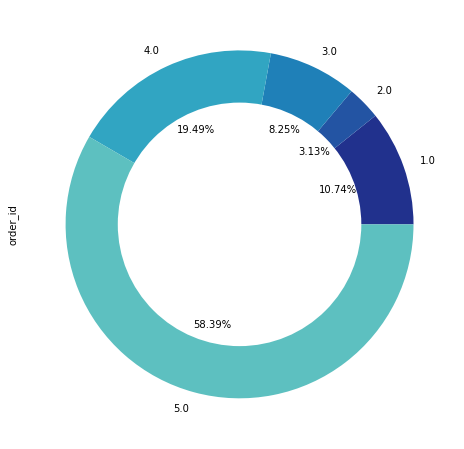

In [31]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette('YlGnBu_r', 8)
df_filtered_review.groupby('review_score')['order_id'].nunique().plot(kind='pie', autopct='%1.2f%%', colors=palette)
centre_circle = plt.Circle((0, 0),0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

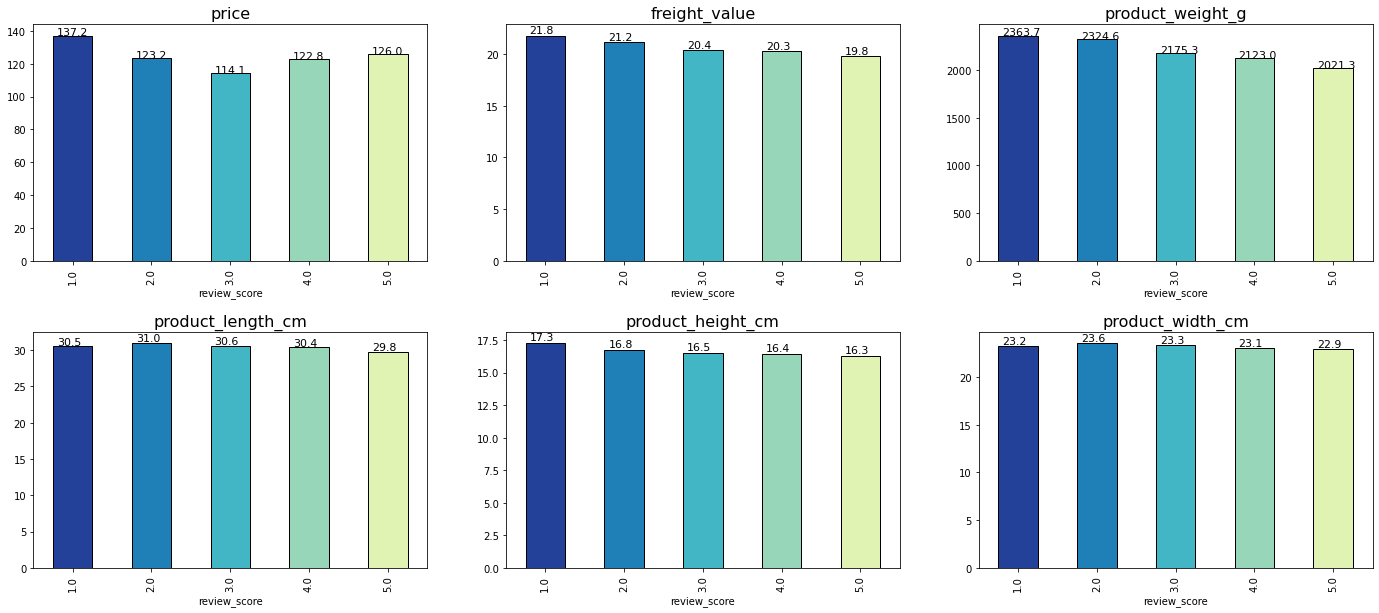

In [32]:
cols = ['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
plt.figure(figsize=(24, 10))
for i, col in enumerate(cols):
    ax = plt.subplot(2, 3, i+1)
    palette = sns.color_palette('YlGnBu_r', 5)
    df_filtered_review.groupby('review_score')[col].mean().plot(kind='bar', color=palette, edgecolor='black')
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.2), fontsize=11)
    plt.title(col, fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()   

- As the physical dimensions of the products increase, the delivery time is delayed as the shipping processes become more difficult.

## How many items are in each order?

In [33]:
df_filtered_order_item.groupby('order_item_id')['review_score'].agg({'count', 'mean'}).reset_index().sort_values(by='count', ascending=False)

,order_item_id,count,mean
0,1,87818,4.172584
1,2,7412,3.659336
2,3,1297,3.509638
3,4,495,3.343434
4,5,197,3.426396
5,6,189,3.338624
6,7,22,2.909091
7,8,8,4.000000
9,10,8,2.250000
11,12,5,3.000000


- The number of products in the order has a significant impact on customer satisfaction.

## ORDER STATUS - REVIEW

In [34]:
df_.drop_duplicates(subset=['order_id'], keep='first').groupby('order_status')['review_score'].agg({'count', 'mean'}). \
                       reset_index().sort_values(by='count', ascending=False)

,order_status,count,mean
2,delivered,95830,4.16
5,shipped,1031,2.00
1,canceled,444,1.58
3,invoiced,307,1.63
4,processing,295,1.28
6,unavailable,6,1.67
0,approved,2,2.50


## OTHER ANALYZES

In [36]:
cat_ = ['payment_type', 'payment_sequential', 'payment_installments']
for i, col in enumerate(cat_):
    display(df_filtered_review.groupby(col)['review_score'].agg({'count', 'mean'}).reset_index())

,payment_type,count,mean
0,boleto,19392,4.12
1,credit_card,73959,4.12
2,debit_card,1508,4.19
3,voucher,2605,4.09


,payment_sequential,count,mean
0,1.00,95877,4.12
1,2.00,1319,4.10
2,3.00,145,3.98
3,4.00,51,4.35
4,5.00,72,4.03


,payment_installments,count,mean
0,1.00,47667,4.15
1,2.00,12037,4.14
2,3.00,10148,4.08
3,4.00,6905,4.08
4,5.00,5087,4.09
5,6.00,3810,4.10
6,7.00,1576,4.07
7,8.00,4160,4.04
8,9.00,615,4.14
9,10.00,5132,4.00


## Conclusion 

- Customers are impatient to wait for their orders, and the longer the order is delivered, the lower the rating given to the order. The main reasons for the increase in delivery time are as follows;
   - The order contains more than one seller,
   - The physical dimensions of the order are large,
   - The Order contains more than one product
- The trade volume of the southeast region is quite large and the majority of customers live in this region.
- The vast majority of orders (approximately 87000 units) contain a single product, and customers should be offered different products during the order steps, cross-selling should be encouraged and they should be encouraged to buy more products.